In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, metrics
from sklearn.naive_bayes import CategoricalNB, GaussianNB

In [139]:
df = pd.read_csv('adult.csv')
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [140]:
(df.where(df == "?")).count()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

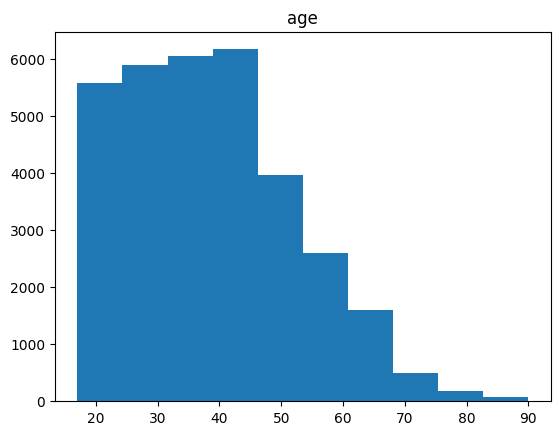

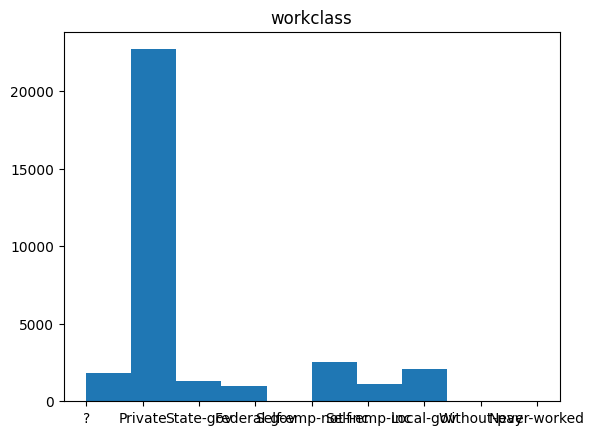

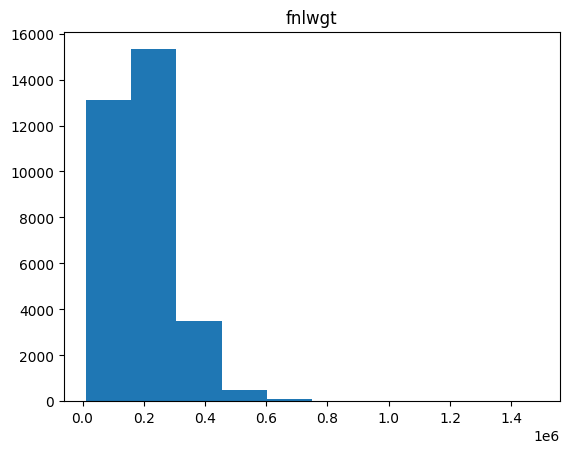

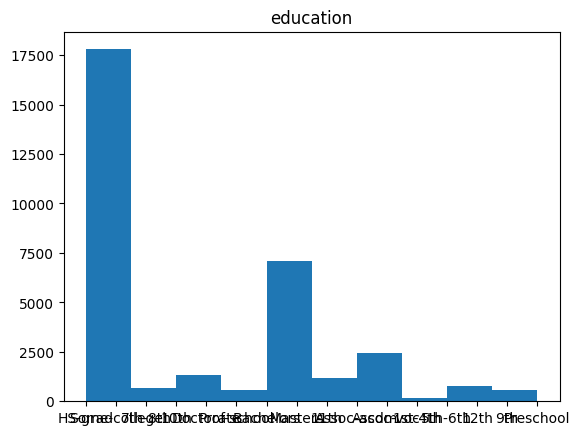

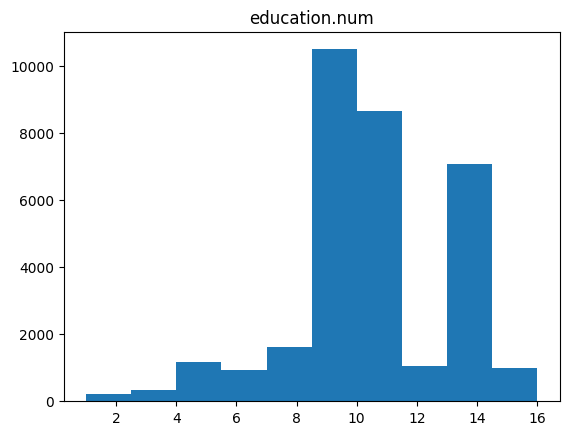

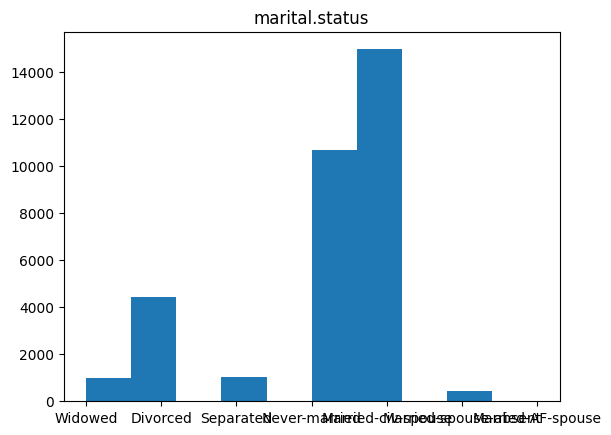

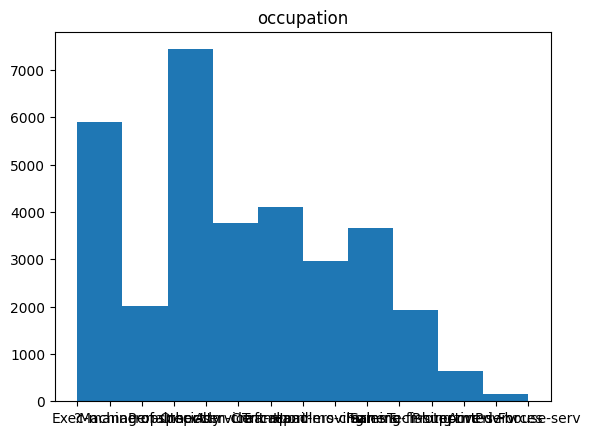

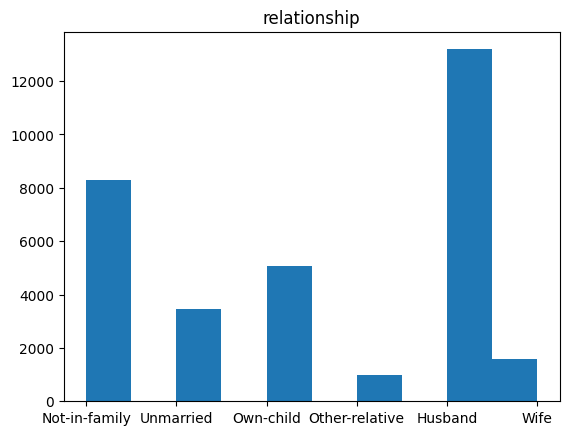

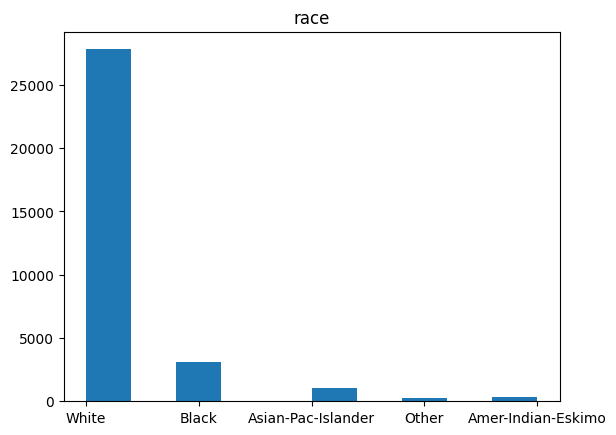

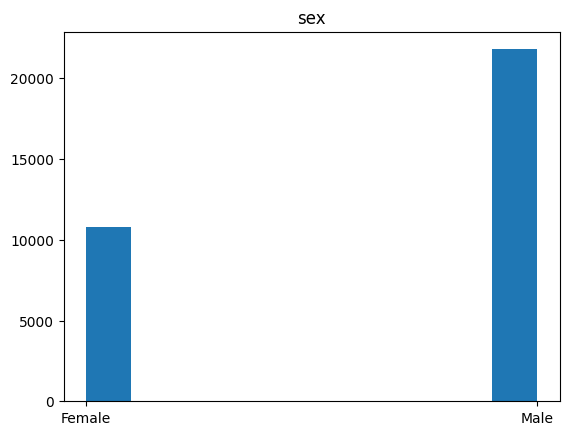

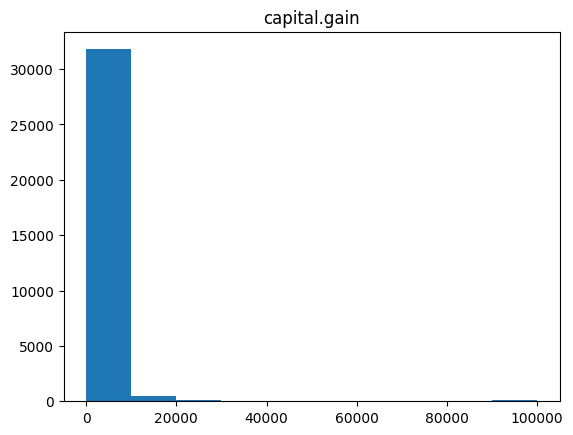

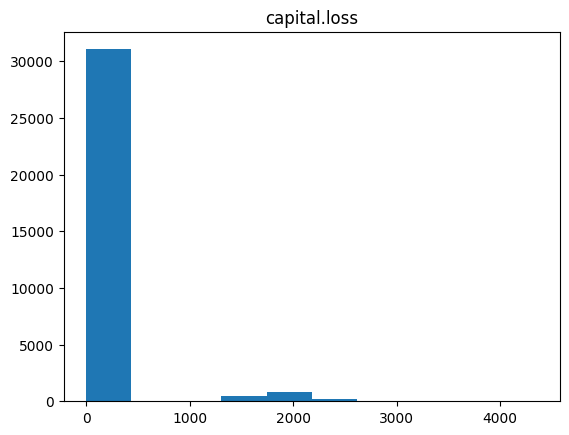

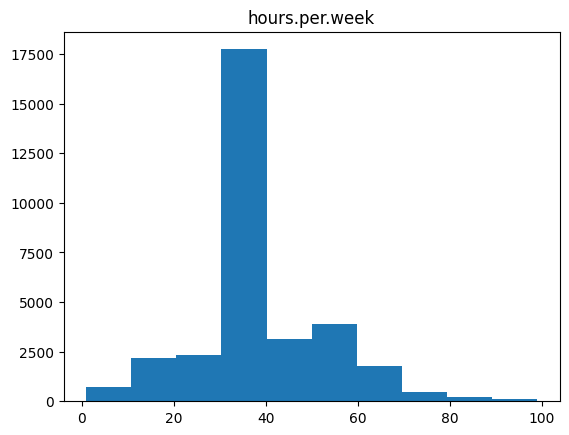

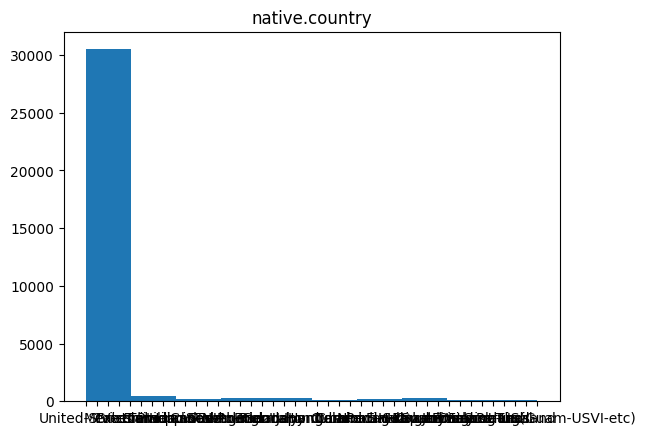

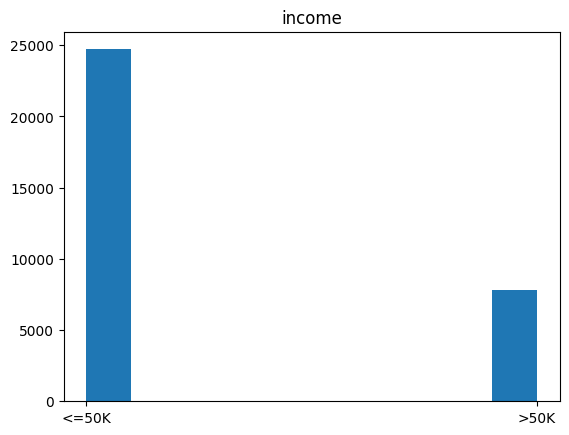

In [122]:
for col in df.columns:
    plt.title(col)
    plt.hist(df[col])
    plt.show()

In [141]:
# remove messy columns
df_clean = df[df != '?'].dropna()
print(len(df) - len(df_clean)) # columns lost
df_clean
(df_clean.where(df_clean == "?")).count()

2399


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [150]:
var_names = list(df_clean.columns)
var_names.remove('income')
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df_clean[var_names], df_clean['income'], test_size=0.33, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

20208
9954
20208
9954


In [154]:
# preprocess categorical data
cat_names = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
df_cat_str = df_clean[cat_names]

cat_encoders = {}

X_train_cat = pd.DataFrame()
X_test_cat = pd.DataFrame()
for col in cat_names:
    # fit encoders
    encoder = preprocessing.LabelEncoder().fit(df_cat_str[col])
    cat_encoders[col] = encoder

    # transform data to labels
    X_train_cat[col] = cat_encoders[col].transform(X_train[col])
    X_test_cat[col] = cat_encoders[col].transform(X_test[col])

In [155]:
df_cont = df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]
df_cont

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [145]:
#income = np.where(df['income'] == '<=50k')

In [156]:
cat_NB = CategoricalNB()
cat_NB.fit(X_train_cat, Y_train)

CategoricalNB()

In [160]:

#cat_NB.predict_proba(df_cat)
#print(cat_NB.category_count_)
#print(cat_NB.class_count_)
#print(cat_NB.class_log_prior_)
#print(cat_NB.classes_)
#print(cat_NB.feature_log_prob_)
#print(cat_NB.n_features_in_)
#print(cat_NB.feature_names_in_)
#print(cat_NB.n_categories_)

In [159]:
#Y_hat = cat_NB.predict(X_test_cat)
#metrics.accuracy_score(Y_hat, Y_test)

0.7853124372111714